In [1]:
#%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
PATH = "./measurements/full-x4"

In [3]:
fechas=['2021-11-19_17-55-37','2021-11-27_16-16-53','2021-11-27_18-22-19']
data=[]

for i in fechas:
    data.append(pd.read_csv(f"{PATH}/{i}/figuras/area_{i}.csv"))

In [9]:
np.array(data)

<ipython-input-9-d04fee483c4a>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(data)


array([    # nro      Area1     Area2      Area3      Area4
       0     1.0   861577.5  680407.0   999943.0   373595.5
       1     2.0   777764.5  680266.5  1013391.5   417690.5
       2     3.0   661939.0  633581.0  1001593.5   437191.5
       3     4.0   494296.5  354747.5   593983.0   690197.0
       4     5.0  1007897.0  743866.5  1160173.0   766309.0
       5     6.0  1090384.5  575843.0  1297863.0   734609.0
       6     7.0  1034822.5  574966.0  1721639.0   730399.0
       7     8.0   983064.0  542898.5  2161321.0   703354.5
       8     9.0   933170.5  481938.5  2209964.0   678543.5
       9    10.0   854629.0  480621.5  1924268.0   693415.0
       10   11.0   785312.0  460160.0  1586859.0   681727.5
       11   12.0  1071947.5  761931.5  1931548.0  1117951.0
       12   13.0  1554731.0  819412.0  2408561.0   913280.0
       13   14.0  1216367.5  774628.5  1529538.0   869515.0
       14   15.0  1044044.0  720184.0  1224833.5   887967.5
       15   16.0  2352027.0  972553.5  2

In [4]:
#OBSERVACIONES EN EL TIEMPO: x, por el eje
#1/4 porque son 4 mediciones en un día, así queda en función de los días
dt=1/4
#x_1= np.arange(0,len(data[0]["# nro"])/4,dt) #Primera medición desde el 03/11 hasta el 05/11; son 7 mediciones
#x_2= np.array([x_1[-1] + dt]) #medición del 05/11 a las 16hs, única medición
#x_3= x_2 + np.arange(dt,len(data[2]["# nro"])/4+dt,dt) #continuación de las mediciones, desde 05/11 a las 18hs hasta 08/11 mediodía, total 11 mediciones
#x_4 NO CONTAR LA MEDICION DEL 08/11 AL MEDIODIA

args=(x_1,x_2,x_3)
x=np.concatenate(args)

NameError: name 'x_1' is not defined

In [ ]:
dt=1/4

x= np.arange(0,len(data[0]["# nro"])/4,dt)

In [6]:
len(data[0]["# nro"])

24

In [7]:
#AREAS
area1=[]
area2=[]
area3=[]
area4=[]

for i in range(len(fechas)):
    area1.append(np.array(data[i]['Area1']))
    area2.append(np.array(data[i]['Area2']))
    area3.append(np.array(data[i]['Area3']))
    area4.append(np.array(data[i]['Area4']))

area1=np.concatenate(area1)
area2=np.concatenate(area2)
area3=np.concatenate(area3)
area4=np.concatenate(area4)

In [8]:
area1/(25*60)

array([ 574.385     ,  518.50966667,  441.29266667,  329.531     ,
        671.93133333,  726.923     ,  689.88166667,  655.376     ,
        622.11366667,  569.75266667,  523.54133333,  714.63166667,
       1036.48733333,  810.91166667,  696.02933333, 1568.018     ,
       1287.598     ,  868.23433333,  683.859     ,  790.718     ,
        557.479     ,  452.89166667,  417.557     ,  831.19133333])

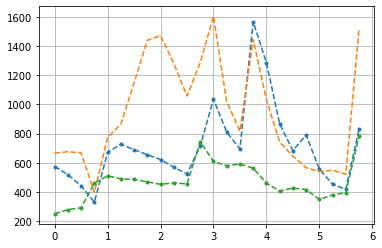

In [9]:
plt.figure('co2')
plt.plot(x,area1/(25*60),'.--')
plt.plot(x,area3/(25*60),'--')
plt.plot(x,area4/(25*60),'.--')
plt.grid(True)
#plt.ylim(400,800)
plt.show()

In [10]:
area_entre=[]
for i in range(len(area1)-1):
    area_entre.append((area1[i]+area1[i+1])*4/(2*25*60))

In [11]:
area_entre

[2185.789333333333,
 1919.6046666666666,
 1541.6473333333333,
 2002.9246666666666,
 2797.708666666667,
 2833.6093333333333,
 2690.5153333333333,
 2554.979333333333,
 2383.732666666667,
 2186.588,
 2476.346,
 3502.238,
 3694.798,
 3013.882,
 4528.094666666667,
 5711.232,
 4311.664666666667,
 3104.1866666666665,
 2949.154,
 2696.394,
 2020.7413333333334,
 1740.8973333333333,
 2497.4966666666664]

La fórmula es 
g= $\frac{F CT 44 g/mol}{22414 . 10^6 0.001L/mol}$

Con F el flujo (1.5L/min), CT el área bajo la curva en MINUTOS, como lo tenemos en segundos:

g= $\frac{F* CT/60 * 44 g/mol}{22414 . 10^6 0.001L/mol}$

In [12]:
F = 1.5
den = 22414 * 0.001 * 10 ** 6

def gramos(x): #meter el área
    return F * x * 44 / (den * 60)

In [13]:
gramos1=np.array(gramos(area1))
gramos2=np.array(gramos(area2))
gramos3=np.array(gramos(area3))
gramos4=np.array(gramos(area4))


In [14]:
#Los ordeno de manera acumulada
gramos1_ac=[gramos1[0]]
gramos2_ac=[gramos2[0]]
gramos3_ac=[gramos3[0]]
gramos4_ac=[gramos4[0]]


for i in range(len(gramos1)-1):
    gramos1_ac.append(gramos1_ac[i]+gramos1[i+1])
    gramos2_ac.append(gramos2_ac[i]+gramos2[i+1])
    gramos3_ac.append(gramos3_ac[i]+gramos3[i+1])
    gramos4_ac.append(gramos4_ac[i]+gramos4[i+1])

Cada área tomada fue de 25 minutos, por tanto, hacemos regla de 3 simples para comparar con el de titulacion (5.5h)

25 min ---- area

5.5h=330min ----

se debe multiplicar al eje Y por 330/25=13.2 ¿¿¿???

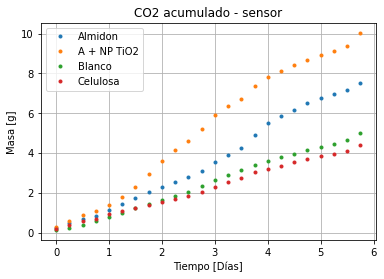

In [28]:
plt.plot(x,np.array(gramos1_ac)*6,'.',label='Almidon')
plt.plot(x,np.array(gramos3_ac)*6,'.',label='A + NP TiO2')
plt.plot(x,np.array(gramos4_ac)*6,'.',label='Blanco')
plt.plot(x,np.array(gramos2_ac)*6,'.',label='Celulosa')
plt.legend()
plt.title('CO2 acumulado - sensor')
plt.xlabel('Tiempo [Días]')
plt.ylabel('Masa [g]')
plt.grid(True)
plt.savefig("co2_acumulado-sensor.png")
plt.show()

In [20]:
len(x)

24

In [24]:
np.array(gramos1_ac)*6

array([0.25369909, 0.48271871, 0.67763249, 0.82318245, 1.11996661,
       1.44103995, 1.74575256, 2.03522443, 2.31000471, 2.56165776,
       2.7928998 , 3.1085442 , 3.56634846, 3.9245186 , 4.23194656,
       4.92452166, 5.49323854, 5.87672742, 6.1787799 , 6.52803073,
       6.77426264, 6.97429956, 7.15872958, 7.525857  ])